### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

### Importing the data

In [2]:
c_aq= pd.read_csv('Customer Acqusition.csv')

In [3]:
repay=pd.read_csv('Repayment.csv')

In [4]:
spend=pd.read_csv('spend.csv')

In [5]:
c_aq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


### Answering the questions below

In [6]:
age_mean=c_aq.Age.mean()

In [7]:
#a

c_aq.loc[:, 'Age'] = c_aq.loc[:, 'Age'].apply(lambda x: age_mean if  x < 18 else x)

#b
Writing a small lambda function for this

In [8]:
spend.columns

Index(['Sl No:', 'Customer', 'Month', 'Type', 'Amount'], dtype='object')

In [9]:
c_aq.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment'],
      dtype='object')

In [10]:
merged_df = pd.merge(pd.merge(c_aq,spend ,on = 'Customer'),repay ,on ='Customer', suffixes=('_spend', '_repayment'))

In [11]:
merged_df

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_spend,Type,Amount_spend,SL No:,Month_repayment,Amount_repayment,Unnamed: 4
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,NaN,12-Jan-04,495414.75,NaN
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,2.0,3-Jan-04,245899.02,NaN
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,3.0,15-Jan-04,259490.06,NaN
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,4.0,25-Jan-04,437555.12,NaN
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,5.0,17-Jan-05,165972.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,98.0,25-Jan-04,310992.30,NaN
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26,99.0,12-Jan-04,121874.90,NaN
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06,100.0,3-Jan-04,337815.57,NaN
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22,101.0,15-Jan-04,25682.73,NaN


First let us merge two tables using customer as primary key.

In [12]:
merged_df['Amount_spend'] = merged_df.apply(lambda row: row['Limit']*0.5 if row['Amount_spend']>row['Limit'] else row['Amount_spend'], axis=1)

merged_df

In [13]:
merged_df

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_spend,Type,Amount_spend,SL No:,Month_repayment,Amount_repayment,Unnamed: 4
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,NaN,12-Jan-04,495414.75,NaN
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,2.0,3-Jan-04,245899.02,NaN
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,3.0,15-Jan-04,259490.06,NaN
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,4.0,25-Jan-04,437555.12,NaN
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,5.0,17-Jan-05,165972.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,98.0,25-Jan-04,310992.30,NaN
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,99.0,12-Jan-04,121874.90,NaN
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,100.0,3-Jan-04,337815.57,NaN
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,101.0,15-Jan-04,25682.73,NaN


In [14]:
merged_df.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'Sl No:', 'Month_spend', 'Type', 'Amount_spend', 'SL No:',
       'Month_repayment', 'Amount_repayment', 'Unnamed: 4'],
      dtype='object')

In [15]:
merged_df.drop(['No','Sl No:','Unnamed: 4'], axis=1, inplace=True)

In [16]:
merged_df.drop(['SL No:'], axis=1, inplace=True)

In [17]:
merged_df

,Customer,Age,City,Product,Limit,Company,Segment,Month_spend,Type,Amount_spend,Month_repayment,Amount_repayment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,3-Jan-04,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,15-Jan-04,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,25-Jan-04,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,25-Jan-04,310992.30
37280,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00,12-Jan-04,121874.90
37281,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50,3-Jan-04,337815.57
37282,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00,15-Jan-04,25682.73


In [18]:
merged_df['Amount_repayment'] = merged_df.apply(lambda row: row['Limit'] if row['Amount_repayment']>row['Limit'] else row['Amount_repayment'], axis=1)

In [19]:
merged_df

,Customer,Age,City,Product,Limit,Company,Segment,Month_spend,Type,Amount_spend,Month_repayment,Amount_repayment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,3-Jan-04,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,15-Jan-04,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,25-Jan-04,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,25-Jan-04,100000.00
37280,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00,12-Jan-04,10000.00
37281,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50,3-Jan-04,10001.00
37282,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00,15-Jan-04,10002.00


In [20]:
merged_df.Customer.value_counts().count()

100

In [21]:
merged_df.columns

Index(['Customer', 'Age', 'City', 'Product', 'Limit', 'Company', 'Segment',
       'Month_spend', 'Type', 'Amount_spend', 'Month_repayment',
       'Amount_repayment'],
      dtype='object')

In [22]:
merged_df.Type.value_counts()

PETRO           4829
CAMERA          4237
FOOD            4056
AIR TICKET      3537
TRAIN TICKET    3387
SHOPPING        2788
BUS TICKET      2417
JEWELLERY       2381
CLOTHES         2243
RENTAL          2021
MOVIE TICKET    1820
BIKE            1255
AUTO             971
CAR              682
SANDALS          660
Name: Type, dtype: int64

In [23]:
merged_df.Type.value_counts().count()

15

In [24]:
average_spent=merged_df.Amount_spend.sum()/merged_df.Amount_spend.count()

In [25]:
average_spent

154167.6761514322

In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37284 entries, 0 to 37283
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer          37284 non-null  object 
 1   Age               37284 non-null  float64
 2   City              37284 non-null  object 
 3   Product           37284 non-null  object 
 4   Limit             37284 non-null  float64
 5   Company           37284 non-null  object 
 6   Segment           37284 non-null  object 
 7   Month_spend       37284 non-null  object 
 8   Type              37284 non-null  object 
 9   Amount_spend      37284 non-null  float64
 10  Month_repayment   37284 non-null  object 
 11  Amount_repayment  37284 non-null  float64
dtypes: float64(4), object(8)
memory usage: 3.7+ MB


### First let us convert the month_spend and month_repayment in date and time column.

In [27]:
merged_df['Month_s']=pd.to_datetime(merged_df['Month_spend'])

In [28]:
merged_df.Month_s

0       2004-01-12
1       2004-01-12
2       2004-01-12
3       2004-01-12
4       2004-01-12
           ...    
37279   2004-01-25
37280   2004-01-12
37281   2004-01-03
37282   2004-01-15
37283   2004-01-25
Name: Month_s, Length: 37284, dtype: datetime64[ns]

In [29]:
merged_df['Month_r']=pd.to_datetime(merged_df['Month_repayment'])

In [30]:
merged_df

,Customer,Age,City,Product,Limit,Company,Segment,Month_spend,Type,Amount_spend,Month_repayment,Amount_repayment,Month_s,Month_r
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,12-Jan-04,495414.75,2004-01-12,2004-01-12
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,3-Jan-04,245899.02,2004-01-12,2004-01-03
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,15-Jan-04,259490.06,2004-01-12,2004-01-15
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,25-Jan-04,437555.12,2004-01-12,2004-01-25
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,17-Jan-05,165972.88,2004-01-12,2005-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,25-Jan-04,100000.00,2004-01-25,2004-01-25
37280,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00,12-Jan-04,10000.00,2004-01-12,2004-01-12
37281,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50,3-Jan-04,10001.00,2004-01-03,2004-01-03
37282,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00,15-Jan-04,10002.00,2004-01-15,2004-01-15


In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37284 entries, 0 to 37283
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer          37284 non-null  object        
 1   Age               37284 non-null  float64       
 2   City              37284 non-null  object        
 3   Product           37284 non-null  object        
 4   Limit             37284 non-null  float64       
 5   Company           37284 non-null  object        
 6   Segment           37284 non-null  object        
 7   Month_spend       37284 non-null  object        
 8   Type              37284 non-null  object        
 9   Amount_spend      37284 non-null  float64       
 10  Month_repayment   37284 non-null  object        
 11  Amount_repayment  37284 non-null  float64       
 12  Month_s           37284 non-null  datetime64[ns]
 13  Month_r           37284 non-null  datetime64[ns]
dtypes: datetime64[ns](2), 

merged_df.info()

### Lets make a copy of the dataset

In [32]:
cp1=merged_df.copy()

In [33]:
cp1['ym_spend'] =cp1['Month_s'].dt.strftime('%Y-%m')

In [34]:
cp1.groupby(cp1.ym_spend)

In [35]:
sum1=cp1.groupby('ym_spend').sum()

In [36]:
sum1

,Age,Limit,Amount_spend,Amount_repayment
ym_spend,,,,
2004-01,344015.50,2.248295e+09,1.143343e+09,1.238320e+09
2004-02,32939.00,2.074306e+08,9.842368e+07,1.190423e+08
2004-03,15630.00,1.006002e+08,5.277091e+07,5.672043e+07
2004-04,32219.38,1.917806e+08,9.049341e+07,1.086926e+08
2004-05,16293.00,1.299102e+08,5.841022e+07,7.263925e+07
2004-09,16219.00,1.177802e+08,6.507525e+07,6.290461e+07
2004-11,15497.00,8.170039e+07,3.125216e+07,5.105995e+07
2005-01,33257.38,2.242305e+08,1.511804e+08,1.156593e+08
2005-02,186491.54,1.495872e+09,6.792701e+08,7.965904e+08


In [37]:
month_revenue=sum1.Amount_repayment-sum1.Amount_spend

In [38]:
month_revenue = pd.DataFrame(month_revenue)

In [39]:
month_revenue.rename(index={0: 'rev_diff'}, inplace=True)

In [40]:
positive_values = month_revenue.loc[month_revenue[0] > 0, 0]

In [41]:
positive_values.to_frame()

,0
ym_spend,
2004-01,9.497695e+07
2004-02,2.061862e+07
2004-03,3.949520e+06
2004-04,1.819921e+07
2004-05,1.422903e+07
2004-11,1.980779e+07
2005-02,1.173203e+08
2005-04,8.741586e+06
2005-05,5.290783e+07


In [42]:
total_sum = (positive_values.apply(lambda x: x * 0.029)).sum()

In [43]:
total_sum

19472284.387569923

In [44]:
print('The total profit from the revenue is', total_sum.round(2), 'INR')

The total profit from the revenue is 19472284.39 INR


In [45]:
merged_df.Type.value_counts().head(5)

PETRO           4829
CAMERA          4237
FOOD            4056
AIR TICKET      3537
TRAIN TICKET    3387
Name: Type, dtype: int64

In [46]:
merged_df.groupby('City').Amount_spend.sum().head(1)

City
BANGALORE    1.081315e+09
Name: Amount_spend, dtype: float64

In [47]:
#We first make bins of ages by knowing the min and max and taking equal interval between them.
#We will use cp2 (copy of dataset for this exercise)
merged_df.Age.max()

79.0

In [48]:
merged_df.Age.min()

19.0

In [49]:
cp2=merged_df.copy()

In [50]:
bins = [19, 29, 39, 49, 59, 69, 79] # specifies the ranges of ages to group

# use cut to create a new column with age bins
cp2['Age Group'] = pd.cut(cp2['Age'], bins)

In [51]:
cp2

,Customer,Age,City,Product,Limit,Company,Segment,Month_spend,Type,Amount_spend,Month_repayment,Amount_repayment,Month_s,Month_r,Age Group
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,12-Jan-04,495414.75,2004-01-12,2004-01-12,"(69, 79]"
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,3-Jan-04,245899.02,2004-01-12,2004-01-03,"(69, 79]"
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,15-Jan-04,259490.06,2004-01-12,2004-01-15,"(69, 79]"
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,25-Jan-04,437555.12,2004-01-12,2004-01-25,"(69, 79]"
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,17-Jan-05,165972.88,2004-01-12,2005-01-17,"(69, 79]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,25-Jan-04,100000.00,2004-01-25,2004-01-25,"(49, 59]"
37280,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00,12-Jan-04,10000.00,2004-01-12,2004-01-12,"(49, 59]"
37281,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50,3-Jan-04,10001.00,2004-01-03,2004-01-03,"(49, 59]"
37282,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00,15-Jan-04,10002.00,2004-01-15,2004-01-15,"(29, 39]"


In [52]:
cp2.groupby('Age Group').Amount_spend.sum().head(1)

Age Group
(19, 29]    1.584093e+09
Name: Amount_spend, dtype: float64

In [53]:
merged_df.groupby('Customer').Amount_repayment.sum().head(10)

Customer
A1      8.556645e+07
A10     6.652166e+07
A100    6.955119e+04
A11     9.559681e+07
A12     2.583776e+08
A13     2.967320e+08
A14     2.462413e+08
A15     1.111083e+08
A16     8.519656e+07
A17     1.056875e+08
Name: Amount_repayment, dtype: float64

In [54]:
cp3=merged_df.copy()

In [55]:
cp3.groupby('City').Amount_repayment.sum().head(10)

City
BANGALORE     1.318799e+09
BOMBAY        9.088361e+08
CALCUTTA      1.062601e+09
CHENNAI       5.410923e+08
COCHIN        1.299971e+09
DELHI         3.568131e+08
PATNA         3.819711e+08
TRIVANDRUM    4.752366e+08
Name: Amount_repayment, dtype: float64

In [56]:
result = cp3.groupby(['City', 'Product', pd.Grouper(key='Month_s', freq='Y')])['Amount_spend'].agg('sum').reset_index()

In [57]:
result.head(20)

,City,Product,Month_s,Amount_spend
0,BANGALORE,Gold,2004-12-31,2.480069e+08
1,BANGALORE,Gold,2005-12-31,3.570769e+08
2,BANGALORE,Gold,2006-12-31,3.293757e+08
3,BANGALORE,Platimum,2004-12-31,2.942657e+07
4,BANGALORE,Platimum,2005-12-31,2.242526e+07
5,BANGALORE,Platimum,2006-12-31,1.732873e+07
6,BANGALORE,Silver,2004-12-31,2.845089e+07
7,BANGALORE,Silver,2005-12-31,1.853810e+07
8,BANGALORE,Silver,2006-12-31,3.068584e+07
9,BOMBAY,Gold,2004-12-31,1.877284e+08


In [58]:
result_2022 = result[result['Month_s'].dt.year == 2004]

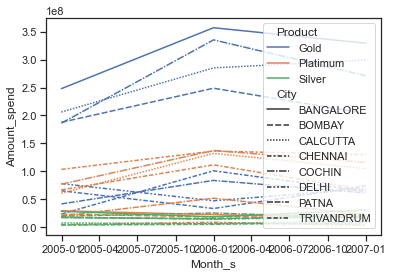

In [59]:
sns.lineplot(data=result, x='Month_s', y='Amount_spend', hue='Product', style='City')
plt.show()

In [60]:
#way2
result = cp3.groupby(['City', 'Product', pd.Grouper(key='Month_s', freq='Y')])['Amount_spend'].agg(['sum', 'count']).reset_index()


In [61]:
result

,City,Product,Month_s,sum,count
0,BANGALORE,Gold,2004-12-31,2.480069e+08,980
1,BANGALORE,Gold,2005-12-31,3.570769e+08,1615
2,BANGALORE,Gold,2006-12-31,3.293757e+08,1353
3,BANGALORE,Platimum,2004-12-31,2.942657e+07,696
4,BANGALORE,Platimum,2005-12-31,2.242526e+07,698
...,...,...,...,...,...
67,TRIVANDRUM,Platimum,2005-12-31,1.116447e+08,930
68,TRIVANDRUM,Platimum,2006-12-31,6.656952e+07,558
69,TRIVANDRUM,Silver,2004-12-31,3.819369e+06,78
70,TRIVANDRUM,Silver,2005-12-31,5.128347e+06,114


In [62]:
cp4=merged_df.copy()

In [63]:
#result4=pd.DataFrame(cp4.groupby(['City',pd.Grouper(key='Month_s', freq='M')])['Amount_spend'].sum())

In [64]:
#result4=result4.reset_index()

In [65]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#
## Group the data by city and month, and calculate the total spend for each group
#result4
#
## Create a bar plot with seaborn
#sns.set_style('whitegrid')
#sns.barplot(x='City', y='Amount_spend', hue='Month_s', data=result4)
#
## Customize the plot
#plt.title('Monthly Comparison of Total Spends by City')
#plt.xlabel('City')
#plt.ylabel('Total Spend')
#plt.xticks(rotation=90)
#plt.legend(title='Month', loc='center left', bbox_to_anchor=(1.0, 0.5))
#plt.show()

In [66]:
monthly_spend = cp4.groupby(['City', cp4['Month_s'].dt.month])['Amount_spend'].sum().reset_index()

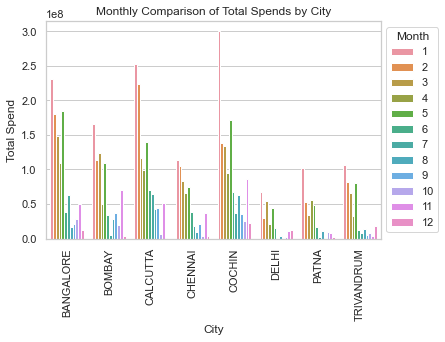

<Figure size 864x432 with 0 Axes>

In [67]:
sns.set_style('whitegrid')
sns.barplot(x='City', y='Amount_spend', hue='Month_s', data=monthly_spend)


# Customize the plot

plt.title('Monthly Comparison of Total Spends by City')
plt.xlabel('City')
plt.ylabel('Total Spend')
plt.xticks(rotation=90)
plt.legend(title='Month', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.figure(figsize=(12, 6))
plt.show()

In [70]:
cp4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37284 entries, 0 to 37283
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer          37284 non-null  object        
 1   Age               37284 non-null  float64       
 2   City              37284 non-null  object        
 3   Product           37284 non-null  object        
 4   Limit             37284 non-null  float64       
 5   Company           37284 non-null  object        
 6   Segment           37284 non-null  object        
 7   Month_spend       37284 non-null  object        
 8   Type              37284 non-null  object        
 9   Amount_spend      37284 non-null  float64       
 10  Month_repayment   37284 non-null  object        
 11  Amount_repayment  37284 non-null  float64       
 12  Month_s           37284 non-null  datetime64[ns]
 13  Month_r           37284 non-null  datetime64[ns]
dtypes: datetime64[ns](2), 

In [71]:
grouped_spending = cp4[cp4['Type'] == 'AIR TICKET'].groupby([cp4['Month_s'].dt.year])['Amount_spend'].sum().reset_index()

In [72]:
grouped_spending

,Month_s,Amount_spend
0,2004,1.126823e+08
1,2005,2.878031e+08
2,2006,1.396326e+08


No handles with labels found to put in legend.


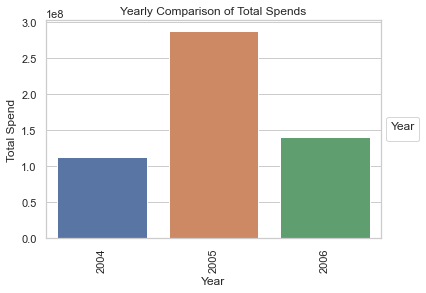

In [73]:
sns.set_style('whitegrid')
sns.barplot(x='Month_s', y='Amount_spend',  data=grouped_spending)


# Customize the plot

plt.title('Yearly Comparison of Total Spends')
plt.xlabel('Year')
plt.ylabel('Total Spend')
plt.xticks(rotation=90)
plt.legend(title='Year', loc='center left', bbox_to_anchor=(1.0, 0.5))
#plt.figure(figsize=(12, 6))
plt.show()

In [74]:
cp5=merged_df.copy()

In [127]:
cp5.columns

Index(['Customer', 'Age', 'City', 'Product', 'Limit', 'Company', 'Segment',
       'Month_spend', 'Type', 'Amount_spend', 'Month_repayment',
       'Amount_repayment', 'Month_s', 'Month_r'],
      dtype='object')

In [87]:
cp5.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month_spend,Type,Amount_spend,Month_repayment,Amount_repayment,Month_s,Month_r
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,12-Jan-04,495414.75,2004-01-12,2004-01-12
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,3-Jan-04,245899.02,2004-01-12,2004-01-03
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,15-Jan-04,259490.06,2004-01-12,2004-01-15
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,25-Jan-04,437555.12,2004-01-12,2004-01-25
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,17-Jan-05,165972.88,2004-01-12,2005-01-17


In [90]:
groupedY = cp5.groupby(['City','Product', pd.Grouper(key='Month_r', freq='Y')])['Amount_repayment'].sum().reset_index()
groupedM = cp5.groupby(['City','Product', pd.Grouper(key='Month_r', freq='M')])['Amount_repayment'].sum().reset_index()
# Define a function to get the top 10 customers for a given city, product, and time period


In [117]:
def get_top_10_customers(product, time_period):
    
    if time_period=='M':
        filtered = groupedM
    elif time_period=='Y':
        filtered = groupedY
        
    val=filtered[(filtered['Product'] == product)].sort_values('Amount_repayment', ascending=False).head(10).reset_index(drop=True)
    return val

In [119]:
get_top_10_customers('Silver', 'M')

,City,Product,Month_r,Amount_repayment
0,BANGALORE,Silver,2004-01-31,29303203.94
1,BOMBAY,Silver,2004-01-31,23100000.00
2,PATNA,Silver,2004-01-31,21822223.92
3,COCHIN,Silver,2004-01-31,21700521.35
4,BANGALORE,Silver,2006-03-31,20400198.00
5,DELHI,Silver,2004-01-31,18885323.74
6,PATNA,Silver,2005-05-31,15140741.38
7,COCHIN,Silver,2006-03-31,13890669.59
8,BANGALORE,Silver,2005-05-31,13200168.00
9,DELHI,Silver,2006-03-31,13200162.00
